In [1]:
'''
The fundamental building block in PyTorch is tensors. 
A PyTorch Tensor is conceptually identical to a numpy array. 
Any computation you might want to perform with numpy can also be accomplished with PyTorch Tensors.

Unlike NumPy, Tensors can utilize GPUs to accelerate numeric computations.
'''
import torch

# PyTorch introduction

In [8]:
from tabulate import tabulate
def DisplayMatrix(M):
    print(tabulate(M, tablefmt='double_grid'))

In [9]:
torch.cuda.is_available()

False

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [11]:
# Create a random matrix
'''
the only difference now is that you can set that device
where it should place this this matrix
'''
x = torch.randn(2,3, device=device)
DisplayMatrix(x)

╔══════════╦════════════╦══════════╗
║ 0.585358 ║ -0.520062  ║ 0.292421 ║
╠══════════╬════════════╬══════════╣
║ 0.480264 ║ -0.0679075 ║ 0.190807 ║
╚══════════╩════════════╩══════════╝


In [13]:
DisplayMatrix(x+1)

╔═════════╦══════════╦═════════╗
║ 1.58536 ║ 0.479938 ║ 1.29242 ║
╠═════════╬══════════╬═════════╣
║ 1.48026 ║ 0.932093 ║ 1.19081 ║
╚═════════╩══════════╩═════════╝


In [14]:
#transpose the matrix
DisplayMatrix(x.T)

╔═══════════╦════════════╗
║  0.585358 ║  0.480264  ║
╠═══════════╬════════════╣
║ -0.520062 ║ -0.0679075 ║
╠═══════════╬════════════╣
║  0.292421 ║  0.190807  ║
╚═══════════╩════════════╝


In [16]:
# Matrix multiplication
DisplayMatrix(torch.matmul(x,x.T))

╔══════════╦══════════╗
║ 0.698619 ║ 0.372239 ║
╠══════════╬══════════╣
║ 0.372239 ║ 0.271672 ║
╚══════════╩══════════╝


In [17]:
'''
we can also use the synthetic sugar and multiplication
just as known from a numpy
'''
DisplayMatrix(x @ x.T)

╔══════════╦══════════╗
║ 0.698619 ║ 0.372239 ║
╠══════════╬══════════╣
║ 0.372239 ║ 0.271672 ║
╚══════════╩══════════╝


In [18]:
## Elementwise multiplication
DisplayMatrix(x * x)

╔══════════╦════════════╦═══════════╗
║ 0.342644 ║ 0.270465   ║ 0.0855102 ║
╠══════════╬════════════╬═══════════╣
║ 0.230654 ║ 0.00461143 ║ 0.0364073 ║
╚══════════╩════════════╩═══════════╝


# PyTorch: Autograd

In [21]:
'''
Manually implementing the backward pass for large networks can quickly get complex. 

With automatic differentiation, this can be done automatically using autograd in PyTorch. 

The forward pass in a network will define a computational graph, where nodes will be 
Tensors and edges will be functions that produce output Tensors from the input Tensors.

The only thing we need to do it specifying requires_grad=True when constructing a Tensor.

With x being a tensor with requires_grad=True, after backpropagation x.grad will be a 
Tensor holding the gradient of x with respect to some scalar value
'''
w=torch.tensor([1.0], device=device, requires_grad=True)
b=torch.tensor([2.0], device=device, requires_grad=True)

In [22]:
# being a tensor with requires_grad=False so no gradient will be computed for them
x=torch.tensor([0.0])
y=torch.tensor([1.0])

In [24]:
'''
Forward pass: compute predicted y using operations on Tensors.

Since w and b have requires_grad=True, operations involving these Tensors will 
cause PyTorch to build a computational graph, allowing automatic computation of gradients.

Since we are no longer implementing the backward pass by hand we 
don't need to keep references to intermediate values.
'''
y_pred = w*x+b # Linear regression model

print(f'True label: {y}', f'\nPredicted: {y_pred}')

True label: tensor([1.]) 
Predicted: tensor([2.], grad_fn=<AddBackward0>)


In [25]:
# Compute and print loss using operations on Tensors and MSE loss
loss = (y_pred - y).pow(2)
loss

tensor([1.], grad_fn=<PowBackward0>)

In [26]:
# Compute gradients
loss.backward()

In [27]:
print(f'Gradient b: {b.grad}')
print(f'Gradient w: {w.grad}')

Gradient b: tensor([2.])
Gradient w: tensor([0.])


In [28]:
'''
so what we're usually doing in an optimization step is computing the
gradient taking a step in the direction of the gradient or in the negative direction of
the gradient and then iterating computing the gradients again

but before recomputing the gradients we have to first zero these
'''
# Manually zero the gradients after running the backward pass
w.grad.zero_()
b.grad.zero_()

tensor([0.])

# PyTorch : nn

In [70]:
'''
For large neural networks, raw autograd can be a bit too low-level.

When building neural networks we usually arrange the computation into layers, 
wheras some have learnable parameters to be optimized during learning.

In PyTorch the nn package defines a set of Modules which are roughly equivalent to 
neural network layers
'''
import torch

N = 64 # N is batch size (64 data points)
D_in = 1000 # D_in is input dimension (feture input 1000 dimension)
H = 100 # H is hidden dimension
D_out = 10 # D_out is output dimension. (10 different classes to classify data in)

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [71]:
#input Data Matrix is (64X1000)
DisplayMatrix(x[:5])

╔═══════════╦═══════════╦════════════╦═══════════╦═══════════╦═══════════╦═══════════╦════════════╦═══════════╦═══════════╦════════════╦═══════════╦═══════════╦═══════════╦══════════╦════════════╦════════════╦════════════╦═══════════╦═══════════╦═══════════╦═══════════╦════════════╦═══════════╦═══════════╦════════════╦═══════════╦════════════╦═══════════╦═══════════╦═══════════╦════════════╦═══════════╦═══════════╦════════════╦═══════════╦═══════════╦═══════════╦═══════════╦════════════╦═══════════╦═══════════╦═══════════╦════════════╦═══════════╦═══════════╦═════════════╦═══════════╦══════════╦══════════════╦═══════════╦═══════════╦═══════════╦════════════╦═══════════╦═══════════╦═══════════╦═══════════╦═══════════╦═══════════╦═══════════╦═══════════╦═══════════╦════════════╦════════════╦═══════════╦═══════════╦═══════════╦════════════╦═══════════╦════════════╦════════════╦═════════════╦═══════════╦═══════════╦═══════════╦═══════════╦════════════╦═══════════╦════════════╦═══════════╦═

In [72]:
#output Data Matrix is (64X10)
DisplayMatrix(y[:5])

╔═══════════╦═══════════╦════════════╦════════════╦═══════════╦════════════╦═══════════╦═══════════╦════════════╦═══════════╗
║ -0.641768 ║ 1.65781   ║  0.203603  ║  1.18249   ║  1.16385  ║ -0.839056  ║  0.686289 ║ -0.725351 ║  0.958111  ║  0.310386 ║
╠═══════════╬═══════════╬════════════╬════════════╬═══════════╬════════════╬═══════════╬═══════════╬════════════╬═══════════╣
║ -0.334907 ║ 0.0857933 ║ -0.883408  ║ -1.01897   ║ -1.34746  ║  0.0885108 ║  2.19316  ║ -1.4507   ║ -0.430934  ║  0.772661 ║
╠═══════════╬═══════════╬════════════╬════════════╬═══════════╬════════════╬═══════════╬═══════════╬════════════╬═══════════╣
║ -0.983265 ║ 0.881418  ║ -0.883047  ║ -0.242382  ║ -0.842537 ║ -0.699183  ║ -1.03448  ║ -1.40313  ║  1.40908   ║ -1.06211  ║
╠═══════════╬═══════════╬════════════╬════════════╬═══════════╬════════════╬═══════════╬═══════════╬════════════╬═══════════╣
║ -0.1265   ║ 2.43559   ║ -1.10864   ║ -0.0394891 ║ -1.2293   ║  0.732866  ║ -0.182444 ║  0.959757 ║ -0.509429  ║  1.4

In [73]:
model=torch.nn.Sequential(
    #liner layer with fully connected to input data having 1000 dimentation fetures
    torch.nn.Linear(D_in, H),
    #puuting through relu activation function to add some non linerity on our network
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
)

In [74]:
'''
instead of manually defining our loss torch has a lot of different
implemented loss functions so in this case we just stick with the mean squared error loss
'''

loss_fn = torch.nn.MSELoss() # reduction = none, default=mean, sum

In [75]:
# we input out data X to the model and get output Y_pred
y_pred = model(x)
y_pred[0], y[0]

#we can see there the difference between actual and predicted value so we are calculating loss

(tensor([-0.1569,  0.1482,  0.0260, -0.4073,  0.1840,  0.0481,  0.1725,  0.1430,
          0.4260,  0.0302], grad_fn=<SelectBackward0>),
 tensor([-0.6418,  1.6578,  0.2036,  1.1825,  1.1638, -0.8391,  0.6863, -0.7254,
          0.9581,  0.3104]))

In [76]:
DisplayMatrix(y[:5])

╔═══════════╦═══════════╦════════════╦════════════╦═══════════╦════════════╦═══════════╦═══════════╦════════════╦═══════════╗
║ -0.641768 ║ 1.65781   ║  0.203603  ║  1.18249   ║  1.16385  ║ -0.839056  ║  0.686289 ║ -0.725351 ║  0.958111  ║  0.310386 ║
╠═══════════╬═══════════╬════════════╬════════════╬═══════════╬════════════╬═══════════╬═══════════╬════════════╬═══════════╣
║ -0.334907 ║ 0.0857933 ║ -0.883408  ║ -1.01897   ║ -1.34746  ║  0.0885108 ║  2.19316  ║ -1.4507   ║ -0.430934  ║  0.772661 ║
╠═══════════╬═══════════╬════════════╬════════════╬═══════════╬════════════╬═══════════╬═══════════╬════════════╬═══════════╣
║ -0.983265 ║ 0.881418  ║ -0.883047  ║ -0.242382  ║ -0.842537 ║ -0.699183  ║ -1.03448  ║ -1.40313  ║  1.40908   ║ -1.06211  ║
╠═══════════╬═══════════╬════════════╬════════════╬═══════════╬════════════╬═══════════╬═══════════╬════════════╬═══════════╣
║ -0.1265   ║ 2.43559   ║ -1.10864   ║ -0.0394891 ║ -1.2293   ║  0.732866  ║ -0.182444 ║  0.959757 ║ -0.509429  ║  1.4

In [77]:
DisplayMatrix(y_pred[:5])

╔═══════════╦════════════╦════════════╦════════════╦════════════╦════════════╦═════════════╦══════════╦═══════════╦════════════╗
║ -0.1569   ║  0.14819   ║  0.0259914 ║ -0.407315  ║  0.183973  ║  0.048111  ║  0.172524   ║ 0.142956 ║ 0.426002  ║  0.0302379 ║
╠═══════════╬════════════╬════════════╬════════════╬════════════╬════════════╬═════════════╬══════════╬═══════════╬════════════╣
║ -0.456729 ║  0.0792332 ║  0.022694  ║ -0.0234539 ║ -0.101709  ║ -0.383804  ║ -0.180577   ║ 0.285107 ║ 0.27233   ║  0.331142  ║
╠═══════════╬════════════╬════════════╬════════════╬════════════╬════════════╬═════════════╬══════════╬═══════════╬════════════╣
║ -0.435722 ║  0.086079  ║ -0.121016  ║  0.155148  ║  0.0917441 ║  0.0990132 ║ -0.00134931 ║ 0.438679 ║ 0.0363167 ║  0.700953  ║
╠═══════════╬════════════╬════════════╬════════════╬════════════╬════════════╬═════════════╬══════════╬═══════════╬════════════╣
║ -0.188142 ║  0.240762  ║ -0.154986  ║  0.52467   ║  0.196467  ║  0.107188  ║ -0.00581224 ║ 0.34

In [78]:
#we can see there the difference between actual and predicted value so we are calculating loss

loss = loss_fn(y_pred, y)
print(loss.item())

0.9947534799575806


In [79]:
# then we can back propagate the loss to compute the gradients though our computational graph
loss.backward()
# now we have access to the Gradient of each of the parameters in our model

In [80]:
# Update the weights using gradient descent. Each parameter is a Tensor, so
# we can access its data and gradients like we did before.
# Example of parameter update

learning_rate = 1e-1
with torch.no_grad():
    for param in model.parameters():
        param.data -= learning_rate * param.grad
model.zero_grad()

In [81]:
# run above piece of code multiple time and see the loss decreasing in each iteration

for i in range(10):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    print(loss.item())
    loss.backward()
    with torch.no_grad():
        for param in model.parameters():
            param.data -= learning_rate * param.grad
    model.zero_grad()

0.888818085193634
0.8038600087165833
0.7335039377212524
0.6733583211898804
0.620881199836731
0.5739952325820923
0.5311230421066284
0.4919437766075134
0.45591697096824646
0.42249155044555664


# PyTorch: Custom nn Modules

In [82]:
'''
You can define your own Modules by subclassing nn.Module and defining the forward pass.

In the constructor we instantiate two nn.Linear modules and assign them as member variables.


'''
import torch

In [92]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H)
        self.linear2 = torch.nn.Linear(H, D_out)
# In the forward function we accept a Tensor of input data and we must return a Tensor of output data. 
# We can use Modules defined in the constructor as well as arbitrary (differentiable) operations 
# on Tensors.
    def forward(self, x):
        relu = torch.nn.ReLU()
        # h_relu = self.linear1(x).clamp(min=0)
        # y_pred = self.linear2(h_relu)
        h_relu = relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred

In [93]:
N = 64 # N is batch size (64 data points)
D_in = 1000 # D_in is input dimension (feture input 1000 dimension)
H = 100 # H is hidden dimension
D_out = 10 # D_out is output dimension. (10 different classes to classify data in)

x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [94]:
model = TwoLayerNet(D_in, H, D_out)

In [95]:
loss_fn = torch.nn.MSELoss()

In [96]:
# Define the optimization algorithm to be used (Stochastic Gradient Descent):
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)

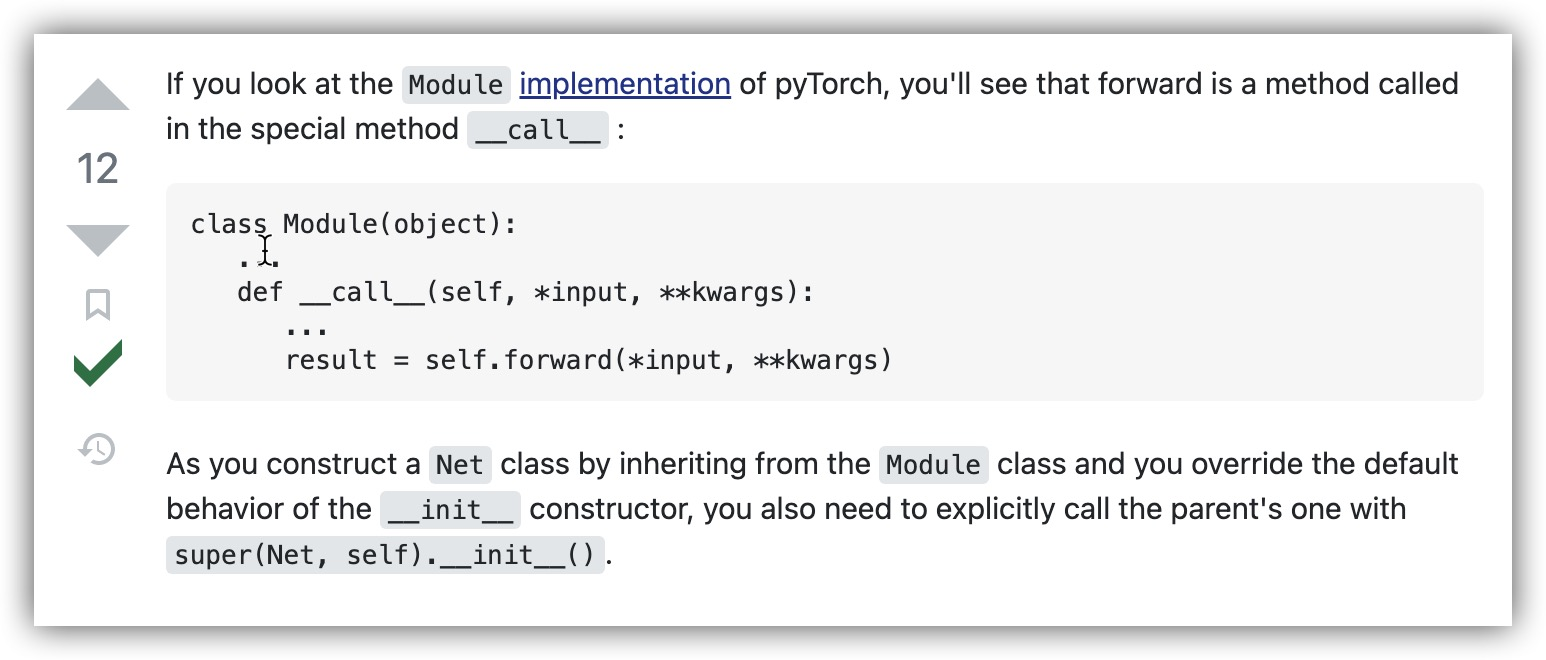

In [102]:
from IPython.display import Image
Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/Pluralsight/Janani Ravi/Building Deep Learning Models Using PyTorch/SB/Image/9/2023-04-10_13-19-15.jpg')

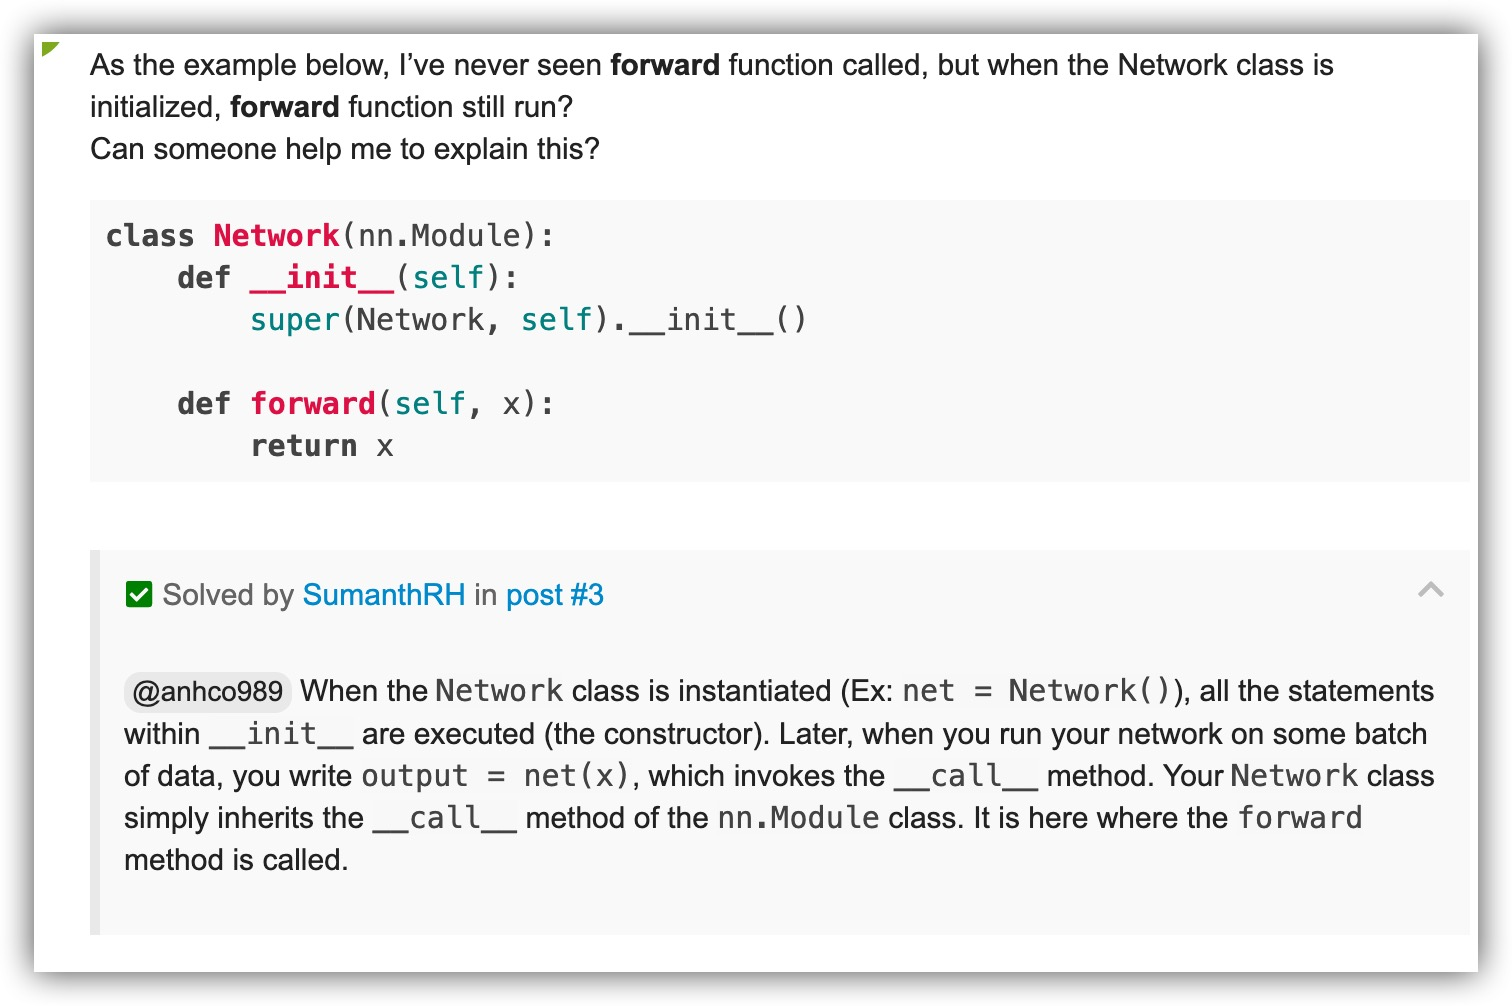

In [101]:

Image('/Users/subhasish/Documents/APPLE/SUBHASISH/Development/GIT/Interstellar/SB-AI-DEV/DL/Pluralsight/Janani Ravi/Building Deep Learning Models Using PyTorch/SB/Image/9/2023-04-10_13-17-45.jpg')

In [97]:
y_pred = model(x)

In [98]:
loss = loss_fn(y_pred, y)
loss.item()

1.1116726398468018

In [99]:
optimizer.zero_grad()
loss.backward()
optimizer.step()

In [100]:
# run above piece of code multiple time and see the loss decreasing in each iteration
for i in range(10):
    y_pred = model(x)
    loss = loss_fn(y_pred, y)
    print(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0.9799596071243286
0.8756001591682434
0.7900484204292297
0.7174679636955261
0.6550759077072144
0.6001799702644348
0.5514792203903198
0.506979763507843
0.4660595953464508
0.4281744956970215
